# 仮説集合の複雑度

参考：
* [統計的学習理論 (機械学習プロフェッショナルシリーズ)](https://amzn.asia/d/5OudVVi)

[前回](MATH_statistical_learning_theory.ipynb)の続きです。
今回は仮説集合の複雑さを測るための尺度について説明します。

## VC次元

VC次元は主に二値判別問題のための仮説集合に対して定義される複雑度ですが、多値判別や回帰問題に拡張することも可能です。
VCの名前は創始者に由来しています。

二値判別のための仮説集合を$\mathcal{H}$とします。
仮説$h\in \mathcal{H}$は、入力空間$\mathcal{X}$から$|\mathcal{Y}|=2$であるようなラベル集合$\mathcal{Y}$への関数とします。

入力の集合$\{x_1, \cdots, x_n\}\subset \mathcal{X}$に対して、全ての仮説$h$の出力による$\mathcal{Y}^n$の部分集合$\{(h(x_1), \cdots, h(x_n))\in \mathcal{Y}^n\mid h \in \mathcal{H}\}$
を考えましょう。この要素数を

$$
\Pi_\mathcal{H}(x_1, \cdots, x_n)=\{(h(x_1), \cdots, h(x_n))\in \mathcal{Y}^n\mid h \in \mathcal{H}\}|
$$
とします。
このとき、$h(x)$は二値を返すので、出力は全部で$2^n$通りあります。よって、$\Pi_\mathcal{H}(x_1, \cdots, x_n) \leq 2^n$が成り立ちます。
逆に、$\Pi_\mathcal{H}(x_1, \cdots, x_n)=2^n$であれば、任意のラベルを表現することができます。

ここで、入力の数$n$が増えると表現のパターンが豊富になり、$\Pi_\mathcal{H}(x_1, \cdots, x_n)=2^n$が成立するような$\mathcal{H}もどんどん大きくなる必要があります。
$2^n$の境界となるデータ数$n$をVC次元と呼びます。つまり、

$$
\operatorname{VC}(\mathcal{H}) = \max\left\{n \in \mathbb{N}\mid \max_{x_1, \cdots, x_n\in \mathcal{X}} \Pi_{\mathcal{H}}(x_1, \cdots, x_n) = 2^n\right\}
$$

つまりこれは、どのようなラベル付にも対応可能な仮説が存在するようなデータ数の上限のことを表します。

VC次元について、次の補題が成立します:

---

**Sauer's lemma**

2値ラベルに値を取る仮説集合$\mathcal{H}$を考えます。このとき、$n\geq \operatorname{VC}(\mathcal{H})$に対して、

$$
\max_{x_1, \cdots, x_n\in \mathcal{X}} \Pi_{\mathcal{H}}(x_1, \cdots, x_n) \leq \left(\frac{en}{\operatorname{VC}(\mathcal{H})}\right)^{\operatorname{VC}(\mathcal{H})}
$$
になります。つまり、表現できるパターンの数のオーダーが$\mathcal{O}(n^{\operatorname{VC}(\mathcal{H})})$になります。

---

[前回](MATH_statistical_learning_theory.ipynb)示した推定誤差のバウンドは有限な集合にしか使えませんでした。次に、無限な仮説集合に適用できるバウンドについて見ていきましょう。

VC次元と予測判別誤差には次の定理が成り立ちます。（証明はラデマッハ複雑度を使うので、一旦置いておきます）

---

仮説集合$\mathcal{H}\subset \{h: \mathcal{X} \to \{+1, -1\}\}$を考えます。
損失として$0-1$損失を使うと、$n\geq \operatorname{VC}(\mathcal{H})$に対して、確率$1-\delta$以上で

$$
\sup_{h\in \mathcal{H}} |R_{err}(h) - \hat{R}_{err}(h)| \leq 
2\sqrt{\frac{2\operatorname{VC}(\mathcal{H})}{n}\log \frac{e\operatorname{VC}(\mathcal{H})}{2n}}
+ \sqrt{\frac{\log (2/\delta)}{2n}}
$$

が成り立ちます。

---

これを使って前回のようにベイズ規則と予測判別誤差の関係を表すと、


$$
R_{err}(h_0) \leq R_{err}(h_S) \leq R_{err}(h_0) + \mathcal{O}_P\left(
\sqrt{\frac{\operatorname{VC}(\mathcal{H})}{n}\log \frac{\operatorname{VC}(\mathcal{H})}{n}}
\right)
$$

が成り立ちます。つまり、予測判別誤差は$\frac{\operatorname{VC}(\mathcal{H})}{n}$と関連しています。

**線形判別器のVC次元**

入力空間を$\mathcal{X}=\mathbb{R}^d$として、仮説集合を

$$
\mathcal{H}=\{h(x)=\operatorname{sign}(w^T x + b)\mid w \in \mathbb{R}^d, b\in \mathbb{R}\}
$$

とします。これは二値判別をする線形判別機の集合です。

ここで、列ベクトルの集合を$\{x_1, \dots, x_{d+1}\}\subset \mathbb{R}^d$とします。
このベクトルの一番最後に$1$を付け足して、それを並べた行列$A\in \mathbb{R}^{d+1 \times d+1}$
は一般に可逆な行列です。

ここで、入力$x_i$にラベル$y_i\in \{+1, -1\}$を割り当てたデータに対して、$A^{-1}y$によって重み$w$と$b$を計算すれば、
$h(x)=\operatorname{sign}(w^T x + b)$に対して$h(x_i)=y_i$が成立します。
つまり、この線形判別機は$d+1$個のデータセットについては完璧に判別することができます。よって
$$
\operatorname{VC}(\mathcal{H}) \geq d+1
$$
です。

一方で、この線形判別機のVC次元の上界は次のラドンの定理によって求めることができます。

---

**ラドンの定理**

任意の点集合 $S = \{x_1, \dots, x_{d+2}\}\subset \mathbb{R}^d$に対して、
$S=S_1\cup S_2$、$S_1 \cap S_2 = \empty$かつ$\operatorname{conv}(S_1) \cup \operatorname{conv} (S_2) \neq \empty$
になるような$S$の分割$S_1$と$S_2$が存在します。

---

次のような図を考えるとわかりやすいです。
下の図は２つに分割できていますが、その凸包同士には被りがあります。

![radon](figs/radon_theorem.png)

任意の点集合$\{x_1, \dots, x_{d+2}\}\subset \mathbb{R}^d$に対して、ラドンの定理から定まる分割$S_1$, $S_2$にそれぞれ$+1$と$-1$のラベルをつけます。
このラベルに正答する線形判別器が存在する場合は$\operatorname{VC}(\mathcal{H}) \geq d+2$になります。
しかし、このような線形判別器は凸包の重なる部分で矛盾が生じます。よってVC次元は$d+1$になります。

d=1なら、d+1個の点の間に必ず直線が引けます。その端点の符号を見れば、判別機によって判別ができます。


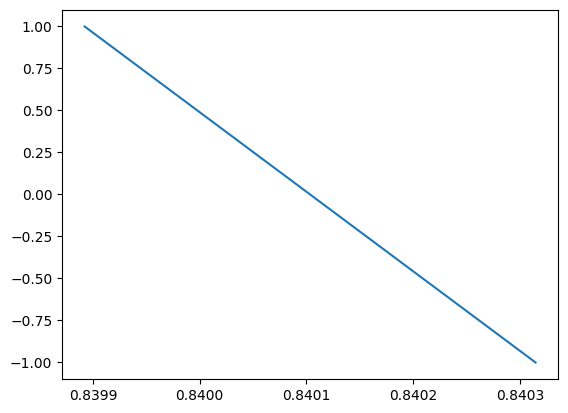

In [45]:
import numpy as np
import matplotlib.pyplot as plt

d = 1
X = np.random.rand(d+1, d)
Y = np.random.choice([-1, 1], d+1)

A = np.hstack((X, np.ones((d+1, 1))))
A_inv = np.linalg.inv(A)

plt.plot(X, Y)
print("d=1なら、d+1個の点の間に必ず直線が引けます。その端点の符号を見れば、判別機によって判別ができます。")